# Statistiques

Ce notebook va vous présenter différantes statistiques sur les mot contenus dans mon mémoire.

In [2]:
import pandas as pan;
import numpy as np;
import io;
import matplotlib.pyplot as plt;

f = io.open("HistoirePhilosophieInformation.md", mode="r", encoding="utf-8")
initialText = f.read()
formattedText = initialText;

charactersToRemove = ["#", "*", ",", "."]
for char in charactersToRemove:
    formattedText = formattedText.replace(char, "")
    initialText = initialText.replace(char, "")

charactersToReplaceBySpace = ["'", "’"]
for char in charactersToReplaceBySpace:
    formattedText = formattedText.replace(char, " ")


def removeEmptyStrings(item):
    return item != ""

def displaySerie(serie): 
    print(len(serie.index))
    plt.figure(figsize=(20, 5))
    plt.xticks(rotation=90)
    plt.plot(serie.index, serie.values)
    plt.show()

def splitTextToWords(lines):
    return pan.Series(
        list(
            filter(removeEmptyStrings, " ".join(lines).split(" "))
        )
    )

lines = initialText.split("\n")
formattedLines = formattedText.split("\n")
wordList = splitTextToWords(lines);
formattedWordList = splitTextToWords(formattedLines);

values_count = formattedWordList.value_counts();

values_more_than_5_letters = values_count[values_count.index.str.len() > 5].loc[lambda x : x > 20]

values_count_over_70 = values_count.loc[lambda x : x > 70]
values_count_35_70 = values_count.loc[lambda x : (x > 35) & (x <= 70)]
values_count_17_34 = values_count.loc[lambda x : (x > 17) & (x <= 35)]
values_count_3_16 = values_count.loc[lambda x : (x > 3) & (x <= 16)]

In [3]:
print(f'Nombre de mots : {len(wordList)}');

Nombre de mots : 57621


120


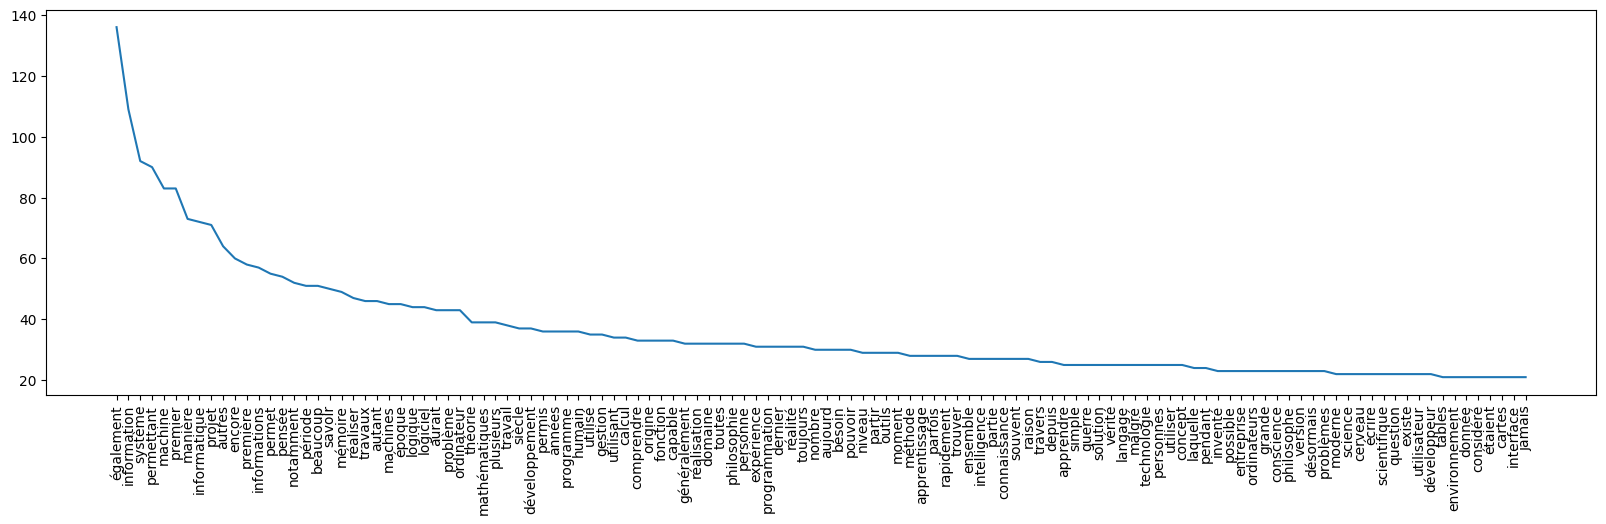

In [4]:
displaySerie(values_more_than_5_letters)
# displaySerie(values_count_over_70)
# displaySerie(values_count_35_70)
# displaySerie(values_count_17_34)
# displaySerie(values_count_3_16)

## Mots par chapitre

In [5]:
formattedWordList

level = 0
chapters = {}
currentPath = ""

0             Histoire
1                   et
2          Philosophie
3                   de
4                    l
             ...      
61304              des
61305    illustrations
61306             Page
61307                d
61308       évaluation
Length: 61309, dtype: object